# **Trabajo 2: Estadística y Análisis Exploratorio**

**Integrantes:**
- Andrés Camilo Henao Serna.
- Anderson Fabian Blanco.
- Isabel Cristina Suárez Roldán.

La base de datos con la que le corresponde trabajar, se obtiene como una muestra aleatoria que corresponde a los resultados obtenidos por los jóvenes de todo el país en las pruebas Saber 11, del año 2022. La información aparece agregada por Colegio y solo abarca los colegios de Antioquia. Dicha base contiene las variables: NATURALEZA (Colegio Oficial o No-Oficial), JORNADA (Asociado a los diferentes tipos de jornada de estudio), PROMLECT
(Promedio obtenido por el colegio en Lectura Crítica) y PROMMATE (Promedio obtenido por el colegio en Matemáticas).

In [19]:
import pandas as pd

df = pd.read_csv("DatosTrabajo2EAE20251.txt", sep=",", encoding="utf-8")

print(df.head())

  NATURALEZA   JORNADA  PROMLECT  PROMMATE
0    OFICIAL  COMPLETA        33        18
1    OFICIAL  COMPLETA         0        19
2    OFICIAL  COMPLETA        30        21
3    OFICIAL  COMPLETA        44        21
4    OFICIAL  COMPLETA        31        25


In [20]:
#Importamos librerias generales para desarrollar el taller

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

**1.** Construir en Python un IC para al 95% de confianza necesario para responder: ¿Puede afirmarse que el resultado
medio obtenido por los colegios en Lectura es superior a 45 puntos? Justifique su respuesta.

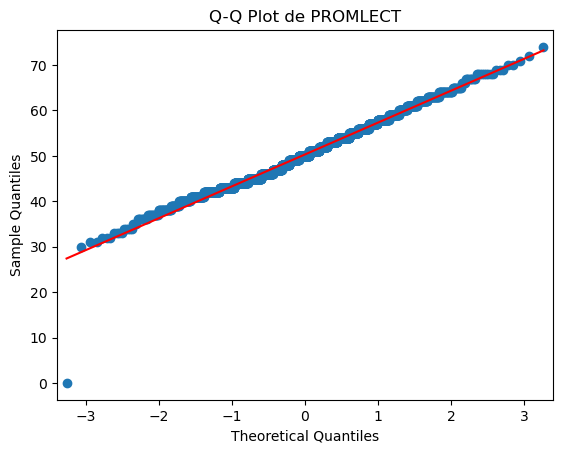

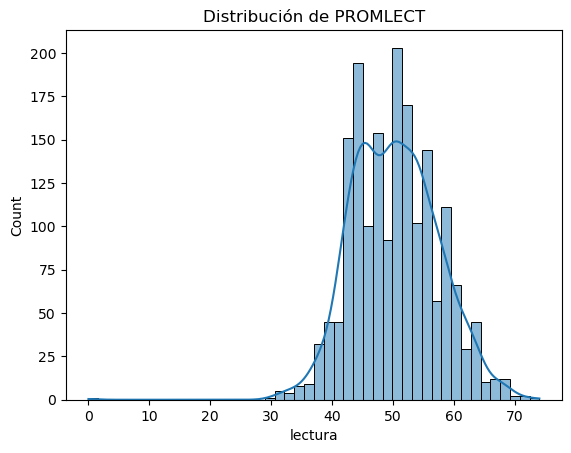

Prueba de Shapiro-Wilk:
Estadístico de Shapiro-Wilk: 0.9867714116015548, p-valor: 7.774420573841173e-12
Los datos NO siguen una distribución normal (rechazamos H0)


In [30]:
# Paso 1: Verificar si los datos PROMLECT tienen una distribución normal.

import statsmodels.api as sm

# Método gráfico Q-Q Plot: compara la distribución de los datos con una distribución normal esperada.

# Extraemos la columna PROMLECT
lectura = df["PROMLECT"].dropna()  # Eliminamos valores nulos si existen

# Generar el Q-Q plot
sm.qqplot(lectura, line='s')
plt.title("Q-Q Plot de PROMLECT")
plt.show()

# Graficamos el histograma de los datos con KDE (curva de densidad)
sns.histplot(lectura, kde=True)
plt.title("Distribución de PROMLECT")
plt.xlabel("lectura")
plt.show()

# Método Shapiro-Wilk: evalúa si los datos provienen de una distribución normal. Su hipótesis nula es que los datos son normales. 
# Si el valor p es menor a 0.05, rechazamos la normalidad.

from scipy.stats import shapiro

# Aplicamos el test

print("Prueba de Shapiro-Wilk:")

stat, p_value = shapiro(lectura)
print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p_value}")

if p_value < 0.05:
    print("Los datos NO siguen una distribución normal (rechazamos H0)")
else:
    print("No se puede rechazar la normalidad de los datos (H0 se mantiene)")

**Aplicamos más pruebas para concluir:**

In [33]:
from scipy.stats import kstest, norm
from scipy.stats import anderson

# Calcular la media y desviación estándar de los datos
mu = np.mean(lectura) 
sigma = np.std(lectura)

# Aplicar la prueba de Kolmogorov-Smirnov: ayudara a comparar la distribución de los datos con una normal estándar.

print("Prueba de Kolmogorov-Smirnov:")

stat, p_value = stats.kstest(lectura, 'norm', args=(mu, sigma))
print(f"Estadístico de Kolmogorov-Smirnov: {stat}, p-valor: {p_value}")

if p_value < 0.05:
    print("Los datos NO siguen una distribución normal (rechazamos H0)")
else:
    print("No se puede rechazar la normalidad de los datos (H0 se mantiene)")


# Aplicar la prueba de Anderson-Darling: forma robusta de verificar la normalidad de los datos

resultado = anderson(lectura, dist='norm')
print(f"Estadístico de Anderson-Darling: {resultado.statistic}")

print("Prueba de Anderson-Darling:")

for i in range(len(resultado.critical_values)):
    nivel_significancia = resultado.significance_level[i]
    critico = resultado.critical_values[i]
    
    if resultado.statistic > critico:
        print(f"A un nivel del {nivel_significancia}%, los datos NO siguen una distribución normal (rechazamos H0)")
    else:
        print(f"A un nivel del {nivel_significancia}%, no se puede rechazar la normalidad de los datos (H0 se mantiene)")

# Prueba de normalidad de Jarque-Bera
jb_stat, jb_pvalue = stats.jarque_bera(lectura)
print("Prueba de Jarque-Bera:")
print("Estadístico:", jb_stat)
print("p-valor:", jb_pvalue)

if jb_pvalue < 0.05:
    print("Rechazamos la hipótesis nula (H0).")
    print("La variable PROMLECT NO sigue una distribución normal.")
else:
    print("No se rechaza la hipótesis nula (H0).")
    print("No hay evidencia suficiente para afirmar que PROMLECT no sigue una distribución normal.")

Prueba de Kolmogorov-Smirnov:
Estadístico de Kolmogorov-Smirnov: 0.06002040603613962, p-valor: 4.222854284417992e-06
Los datos NO siguen una distribución normal (rechazamos H0)
Estadístico de Anderson-Darling: 4.314618275509474
Prueba de Anderson-Darling:
A un nivel del 15.0%, los datos NO siguen una distribución normal (rechazamos H0)
A un nivel del 10.0%, los datos NO siguen una distribución normal (rechazamos H0)
A un nivel del 5.0%, los datos NO siguen una distribución normal (rechazamos H0)
A un nivel del 2.5%, los datos NO siguen una distribución normal (rechazamos H0)
A un nivel del 1.0%, los datos NO siguen una distribución normal (rechazamos H0)
Prueba de Jarque-Bera:
Estadístico: 89.50325322145382
p-valor: 3.66957278947812e-20
Rechazamos la hipótesis nula (H0).
La variable PROMLECT NO sigue una distribución normal.


**Conclusiones:** Los resultados sugieren que los datos de PROMLECT no siguen una distribución normal.

**Pruebas de normalidad**: Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling y Jarque-Bera han rechazado la hipótesis nula, lo que indica que los datos no siguen una distribución normal.

**Histograma con KDE:** Se observa una forma asimétrica y posiblemente con colas más pesadas que una normal. Además, hay una ligera desviación de la campana de Gauss esperada en una distribución normal.

**Gráfico Q-Q:** Se observan desviaciones en los extremos, lo que sugiere la presencia de valores atípicos o una distribución con colas más largas o más cortas que la normal.

In [25]:
# Paso 2: Cálculo del intervalo de confianza al 95% usando Z (Teorema del Límite Central)

n = len(lectura)
print(f"El tamaño de la muestra es: {n}")

# El tamaño de la muestra es: 1807; es decir, n>=30

x_bar = np.mean(lectura)  # Media muestral
s = np.std(lectura, ddof=1)  # Desviación estándar muestral: por defecto cuando a un objeto como dataframe de pandas te calcula con el metodo std la varianza muestral (osea divide por n-1)

# Valor crítico Z para un IC del 95% (distribución normal estándar)
alpha = 0.05
z_critico = stats.norm.ppf(1 - alpha/2)

# Intervalo de confianza usando Z
margen_error_z = z_critico * (s / np.sqrt(n))
IC_lower_z = x_bar - margen_error_z
IC_upper_z = x_bar + margen_error_z

print(f"Valor crítico: {z_critico:.4f}")
print(f"Media muestral: {x_bar:.4f}")
print(f"Desviación estándar muestral: {s:.4f}")
print(f"Margen de error: {margen_error_z:.4f}")
print(f"Intervalo de confianza del 95%: ({IC_lower_z:.4f}, {IC_upper_z:.4f})")

# Conclusión
if IC_lower_z > 45:
    print("Se puede afirmar con un 95% de confianza que el promedio de lectura es superior a 45 puntos.")
else:
    print("No se puede afirmar con un 95% de confianza que el promedio de lectura sea superior a 45 puntos.")

El tamaño de la muestra es: 1807
Valor crítico: 1.9600
Media muestral: 50.3215
Desviación estándar muestral: 7.0280
Margen de error: 0.3240
Intervalo de confianza del 95%: (49.9975, 50.6456)
Se puede afirmar con un 95% de confianza que el promedio de lectura es superior a 45 puntos.


**2.** ¿Se puede afirmar que el resultado medio obtenido por los colegios en Matemáticas es mayor en los Privados que
en los Públicos? Justifique su respuesta mediante una prueba de hipótesis con una significancia del 4%.

In [26]:
# Separar los datos en dos grupos según la NATURALEZA del colegio

privados = df[df["NATURALEZA"] == "NO OFICIAL"]["PROMMATE"].dropna()
publicos = df[df["NATURALEZA"] == "OFICIAL"]["PROMMATE"].dropna()

# Aplicar prueba de normalidad de Shapiro-Wilk a ambos grupos
shapiro_privados = stats.shapiro(privados)
shapiro_publicos = stats.shapiro(publicos)

# Imprimir resultados de la prueba de Shapiro-Wilk
print("Resultados de la prueba de normalidad de Shapiro-Wilk:")
print(f"Privados (NO OFICIAL): Estadístico = {shapiro_privados.statistic:.4f}, p-valor = {shapiro_privados.pvalue:.6f}")
print(f"Públicos (OFICIAL): Estadístico = {shapiro_publicos.statistic:.4f}, p-valor = {shapiro_publicos.pvalue:.6f}")

# Evaluar normalidad
def evaluar_normalidad(p_valor):
    return "Rechazamos H0: No es normal" if p_valor < 0.04 else "No se rechaza H0: Puede ser normal"

print("\nInterpretación de los resultados:")
print(f"Privados: {evaluar_normalidad(shapiro_privados.pvalue)}")
print(f"Públicos: {evaluar_normalidad(shapiro_publicos.pvalue)}")

Resultados de la prueba de normalidad de Shapiro-Wilk:
Privados (NO OFICIAL): Estadístico = 0.9819, p-valor = 0.000280
Públicos (OFICIAL): Estadístico = 0.9935, p-valor = 0.000005

Interpretación de los resultados:
Privados: Rechazamos H0: No es normal
Públicos: Rechazamos H0: No es normal


**Aplicamos más pruebas:**

Resultados de la prueba de Kolmogorov-Smirnov:
Privados (NO OFICIAL): Estadístico D = 0.0530, p-valor = 0.035293
Públicos (OFICIAL): Estadístico D = 0.0530, p-valor = 0.000505
Los datos de privados no siguen una distribución normal.
Los datos de públicos no siguen una distribución normal.
Resultados de la prueba de Anderson-Darling:
Privados (NO OFICIAL): Estadístico = 2.3837
Públicos (OFICIAL): Estadístico = 2.9320
Comparación con valores críticos de Anderson-Darling:
Nivel 15% -> Valor crítico (Privados): 0.5690, (Públicos): 0.5740
Nivel 10% -> Valor crítico (Privados): 0.6490, (Públicos): 0.6540
Nivel 5% -> Valor crítico (Privados): 0.7780, (Públicos): 0.7850
Nivel 2.5% -> Valor crítico (Privados): 0.9080, (Públicos): 0.9160
Nivel 1% -> Valor crítico (Privados): 1.0800, (Públicos): 1.0890
Según Anderson-Darling, los datos de privados no son normales (4% de significancia).
Según Anderson-Darling, los datos de públicos no son normales (4% de significancia).


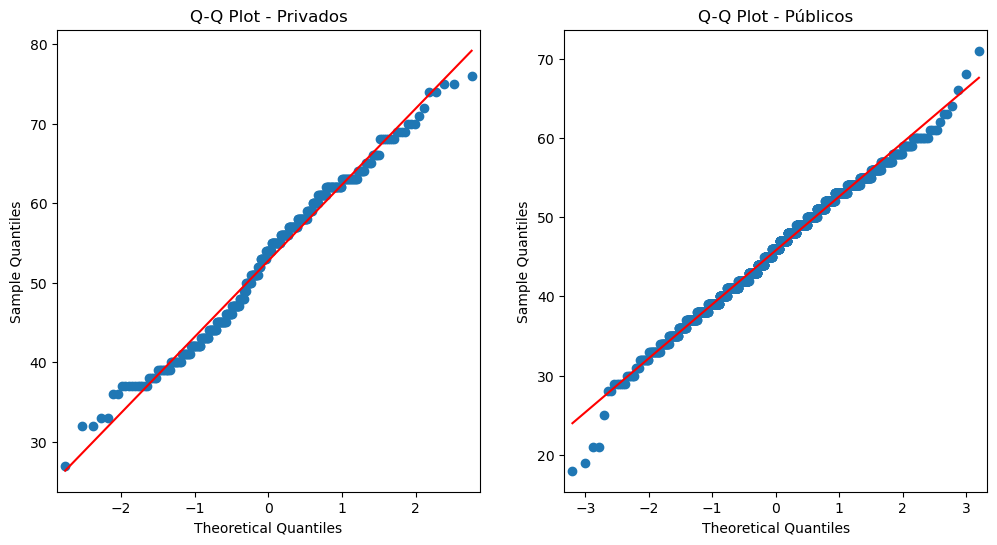

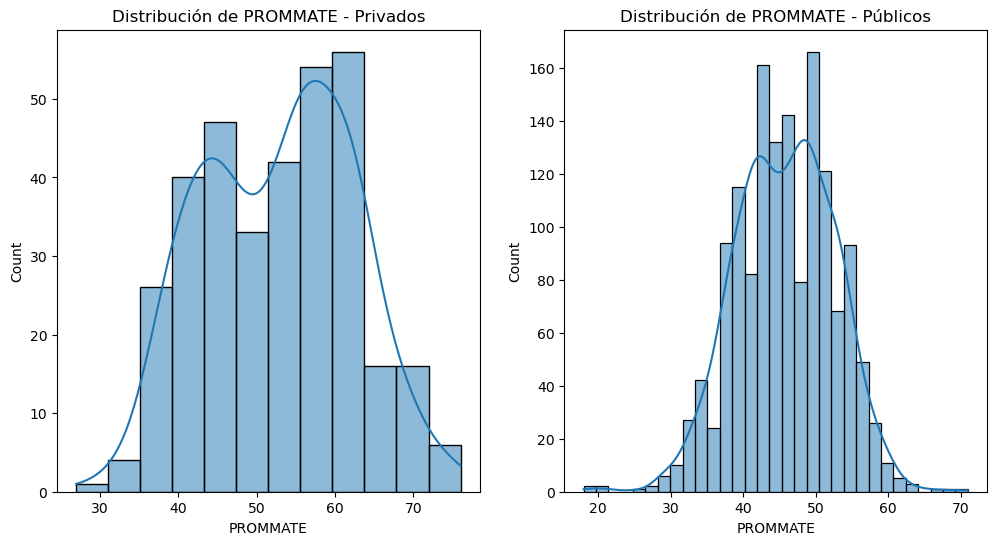

In [34]:
# Aplicar prueba de Kolmogorov-Smirnov
d, p_ks_privados = stats.kstest(privados, 'norm', args=(privados.mean(), privados.std()))
d, p_ks_publicos = stats.kstest(publicos, 'norm', args=(publicos.mean(), publicos.std()))

# Aplicar prueba de Anderson-Darling
ad_privados = stats.anderson(privados, dist='norm')
ad_publicos = stats.anderson(publicos, dist='norm')

# Resultados de Kolmogorov-Smirnov
print("Resultados de la prueba de Kolmogorov-Smirnov:")
print(f"Privados (NO OFICIAL): Estadístico D = {d:.4f}, p-valor = {p_ks_privados:.6f}")
print(f"Públicos (OFICIAL): Estadístico D = {d:.4f}, p-valor = {p_ks_publicos:.6f}")

if p_ks_privados < 0.04:
    print("Los datos de privados no siguen una distribución normal.")
else:
    print("No se rechaza la normalidad para privados.")

if p_ks_publicos < 0.04:
    print("Los datos de públicos no siguen una distribución normal.")
else:
    print("No se rechaza la normalidad para públicos.")

# Resultados de Anderson-Darling
print("Resultados de la prueba de Anderson-Darling:")
print(f"Privados (NO OFICIAL): Estadístico = {ad_privados.statistic:.4f}")
print(f"Públicos (OFICIAL): Estadístico = {ad_publicos.statistic:.4f}")

# Comparación con valores críticos
niveles_significancia = [15, 10, 5, 2.5, 1]  # Niveles de significancia en porcentaje
print("Comparación con valores críticos de Anderson-Darling:")
for i, alpha in enumerate(niveles_significancia):
    print(f"Nivel {alpha}% -> Valor crítico (Privados): {ad_privados.critical_values[i]:.4f}, (Públicos): {ad_publicos.critical_values[i]:.4f}")

# Evaluar normalidad según Anderson-Darling (nivel de 4%)
indice_significancia = 2  # El 4% está entre el 5% y el 2.5%, se usa el más cercano (5%)

if ad_privados.statistic > ad_privados.critical_values[indice_significancia]:
    print("Según Anderson-Darling, los datos de privados no son normales (4% de significancia).")
else:
    print("Según Anderson-Darling, los datos de privados podrían ser normales.")

if ad_publicos.statistic > ad_publicos.critical_values[indice_significancia]:
    print("Según Anderson-Darling, los datos de públicos no son normales (4% de significancia).")
else:
    print("Según Anderson-Darling, los datos de públicos podrían ser normales.")

# Q-Q Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sm.qqplot(privados, line='s', ax=axes[0])
axes[0].set_title("Q-Q Plot - Privados")
sm.qqplot(publicos, line='s', ax=axes[1])
axes[1].set_title("Q-Q Plot - Públicos")
plt.show()

# Graficamos histogramas con KDE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(privados, kde=True, ax=axes[0])
axes[0].set_title("Distribución de PROMMATE - Privados")
sns.histplot(publicos, kde=True, ax=axes[1])
axes[1].set_title("Distribución de PROMMATE - Públicos")
plt.show()

**Por lo tanto concluimos que ninguno de los dos tiene datos con distribución normal.**

In [14]:
# Contar el número de observaciones en cada grupo
n_privados = len(privados)
n_publicos = len(publicos)

# Mostrar los tamaños de muestra
print(f"Tamaño de muestra - Privados: {n_privados}")
print(f"Tamaño de muestra - Públicos: {n_publicos}")

Tamaño de muestra - Privados: 341
Tamaño de muestra - Públicos: 1466


**Como las muestras son >= 30 y no conocemos las varianzas σ^2**

In [35]:
from scipy.stats import norm
import numpy as np

#Hipótesis:
#H0: El resultado medio obtenido por los colegios en Matemáticas es menor o igual en los Privados que en los Públicos
#Ha: El resultado medio obtenido por los colegios en Matemáticas es mayor en los Privados que en los Públicos

# Calcular las medias y desviaciones estándar muestrales
media_privados = np.mean(privados)
media_publicos = np.mean(publicos)
std_privados = np.std(privados, ddof=1)
std_publicos = np.std(publicos, ddof=1)

print(f"Media en privados: {media_privados:.4f}")
print(f"Media en públicos: {media_publicos:.4f}")
print(f"Desviación estándar en privados: {std_privados:.4f}")
print(f"Desviación estándar en públicos: {std_publicos:.4f}")

# Calcular el estadístico Zc
Zc = (media_privados - media_publicos) / np.sqrt((std_privados**2 / n_privados) + (std_publicos**2 / n_publicos))

# Nivel de significancia del 4 % (0.04)
alpha = 0.04

# Valor crítico Z_alpha para una prueba unilateral a la derecha
Z_alpha = norm.ppf(1 - alpha)

print(f"Estadístico de prueba Zc: {Zc:.4f}")
print(f"Valor crítico Z_alpha: {Z_alpha:.4f}")

# Tomamos la decisión
if Zc > Z_alpha:
    print("Rechazamos la hipótesis nula H0.")
    print("Conclusión: Con un 96% de confianza, podemos afirmar que los colegios privados tienen un resultado medio mayor en Matemáticas que los públicos.")
else:
    print("No se rechaza la hipótesis nula H0.")
    print("Conclusión: No hay suficiente evidencia para afirmar que los colegios privados tienen un resultado medio mayor en Matemáticas que los públicos.")

Media en privados: 52.7537
Media en públicos: 45.7913
Desviación estándar en privados: 9.5946
Desviación estándar en públicos: 6.8090
Estadístico de prueba Zc: 12.6781
Valor crítico Z_alpha: 1.7507
Rechazamos la hipótesis nula H0.
Conclusión: Con un 96% de confianza, podemos afirmar que los colegios privados tienen un resultado medio mayor en Matemáticas que los públicos.


In [36]:
# Calcular el valor p para una prueba unilateral a la derecha
p_value = 1 - norm.cdf(Zc)

print(f"Valor p: {p_value:.6f}")

# Tomamos la decisión basándonos en el valor p
if p_value < alpha:
    print("Rechazamos la hipótesis nula H0.")
    print("Conclusión: Con un 96% de confianza, podemos afirmar que los colegios privados tienen un resultado medio mayor en Matemáticas que los públicos.")
else:
    print("No se rechaza la hipótesis nula H0.")
    print("Conclusión: No hay suficiente evidencia para afirmar que los colegios privados tienen un resultado medio mayor en Matemáticas que los públicos.")

Valor p: 0.000000
Rechazamos la hipótesis nula H0.
Conclusión: Con un 96% de confianza, podemos afirmar que los colegios privados tienen un resultado medio mayor en Matemáticas que los públicos.


**3.** Analice si la variable PROMLEC tiene distrubición normal, con μ se considera como la media muestral x̅ y σ como
la varianza muestral S.

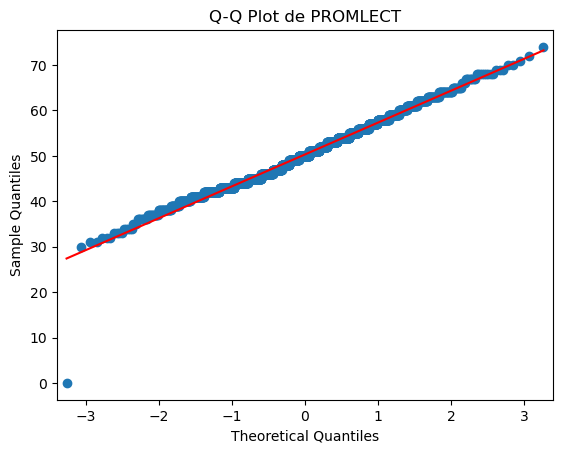

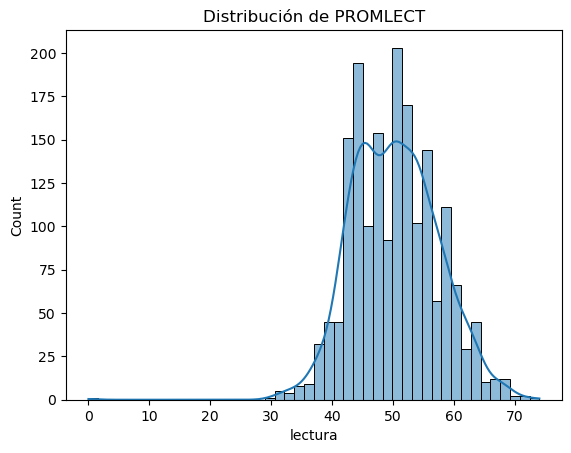

Prueba de Shapiro-Wilk:
Estadístico de Shapiro-Wilk: 0.9867714116015548, p-valor: 7.774420573841173e-12
Los datos NO siguen una distribución normal (rechazamos H0)


In [37]:
import statsmodels.api as sm

# Método gráfico Q-Q Plot: compara la distribución de los datos con una distribución normal esperada.

# Extraemos la columna PROMLECT
lectura = df["PROMLECT"].dropna()  # Eliminamos valores nulos si existen

# Generar el Q-Q plot
sm.qqplot(lectura, line='s')
plt.title("Q-Q Plot de PROMLECT")
plt.show()

# Graficamos el histograma de los datos con KDE (curva de densidad)
sns.histplot(lectura, kde=True)
plt.title("Distribución de PROMLECT")
plt.xlabel("lectura")
plt.show()

# Método Shapiro-Wilk: evalúa si los datos provienen de una distribución normal. Su hipótesis nula es que los datos son normales. 
# Si el valor p es menor a 0.05, rechazamos la normalidad.

from scipy.stats import shapiro

# Aplicamos el test

print("Prueba de Shapiro-Wilk:")

stat, p_value = shapiro(lectura)
print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p_value}")

if p_value < 0.05:
    print("Los datos NO siguen una distribución normal (rechazamos H0)")
else:
    print("No se puede rechazar la normalidad de los datos (H0 se mantiene)")

In [38]:
from scipy.stats import kstest, norm
from scipy.stats import anderson

# Calcular la media y desviación estándar de los datos
mu = np.mean(lectura) 
sigma = np.std(lectura)

# Aplicar la prueba de Kolmogorov-Smirnov: ayudara a comparar la distribución de los datos con una normal estándar.

print("Prueba de Kolmogorov-Smirnov:")

stat, p_value = stats.kstest(lectura, 'norm', args=(mu, sigma))
print(f"Estadístico de Kolmogorov-Smirnov: {stat}, p-valor: {p_value}")

if p_value < 0.05:
    print("Los datos NO siguen una distribución normal (rechazamos H0)")
else:
    print("No se puede rechazar la normalidad de los datos (H0 se mantiene)")

# Aplicar la prueba de Anderson-Darling: forma robusta de verificar la normalidad de los datos

resultado = anderson(lectura, dist='norm')
print(f"Estadístico de Anderson-Darling: {resultado.statistic}")

print("Prueba de Anderson-Darling:")

for i in range(len(resultado.critical_values)):
    nivel_significancia = resultado.significance_level[i]
    critico = resultado.critical_values[i]
    
    if resultado.statistic > critico:
        print(f"A un nivel del {nivel_significancia}%, los datos NO siguen una distribución normal (rechazamos H0)")
    else:
        print(f"A un nivel del {nivel_significancia}%, no se puede rechazar la normalidad de los datos (H0 se mantiene)")

# Prueba de normalidad de Jarque-Bera
jb_stat, jb_pvalue = stats.jarque_bera(lectura)
print("Prueba de Jarque-Bera:")
print("Estadístico:", jb_stat)
print("p-valor:", jb_pvalue)

if jb_pvalue < 0.05:
    print("Rechazamos la hipótesis nula (H0).")
    print("La variable PROMLECT NO sigue una distribución normal.")
else:
    print("No se rechaza la hipótesis nula (H0).")
    print("No hay evidencia suficiente para afirmar que PROMLECT no sigue una distribución normal.")

Prueba de Kolmogorov-Smirnov:
Estadístico de Kolmogorov-Smirnov: 0.06002040603613962, p-valor: 4.222854284417992e-06
Los datos NO siguen una distribución normal (rechazamos H0)
Estadístico de Anderson-Darling: 4.314618275509474
Prueba de Anderson-Darling:
A un nivel del 15.0%, los datos NO siguen una distribución normal (rechazamos H0)
A un nivel del 10.0%, los datos NO siguen una distribución normal (rechazamos H0)
A un nivel del 5.0%, los datos NO siguen una distribución normal (rechazamos H0)
A un nivel del 2.5%, los datos NO siguen una distribución normal (rechazamos H0)
A un nivel del 1.0%, los datos NO siguen una distribución normal (rechazamos H0)
Prueba de Jarque-Bera:
Estadístico: 89.50325322145382
p-valor: 3.66957278947812e-20
Rechazamos la hipótesis nula (H0).
La variable PROMLECT NO sigue una distribución normal.


**Conclusión:** la variable PROMLEC NO tiene distrubición normal.